In [15]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import glob
import seaborn as sns

In [16]:
#Creating a single data frame using all 15 CSV files

path = r'/home/harindu/Assignment_II/accel_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

activityDF = pd.concat(li, axis=0, ignore_index=True)

In [17]:
activityDF.columns = ['index', 'xAccel', 'yAccel', 'zAccel', 'activity']
activityDF = activityDF.drop(['index'], axis=1)
activityDF = activityDF.drop(activityDF[activityDF.activity == 0].index)
activityDF['activity'].value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
Name: activity, dtype: int64

In [18]:
print("Number of duplicate values in train data is "+str(sum(activityDF.duplicated())))

Number of duplicate values in train data is 492905


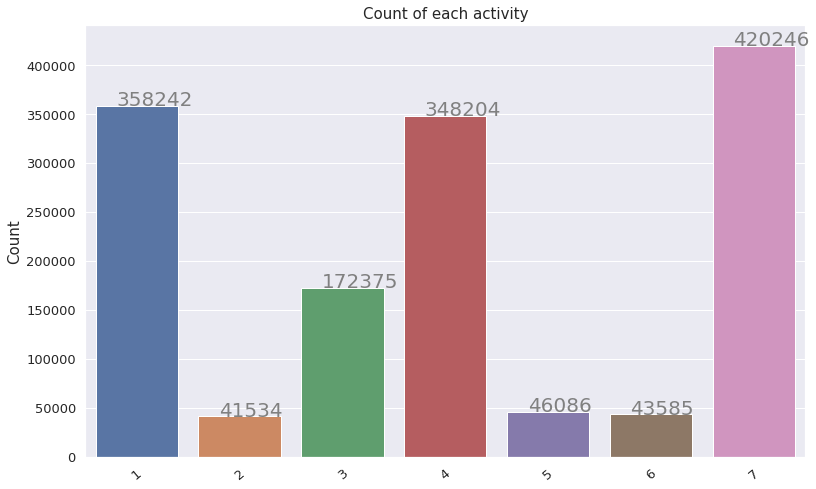

In [27]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity", data = activityDF)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

In [20]:
activityDF = activityDF.drop_duplicates()

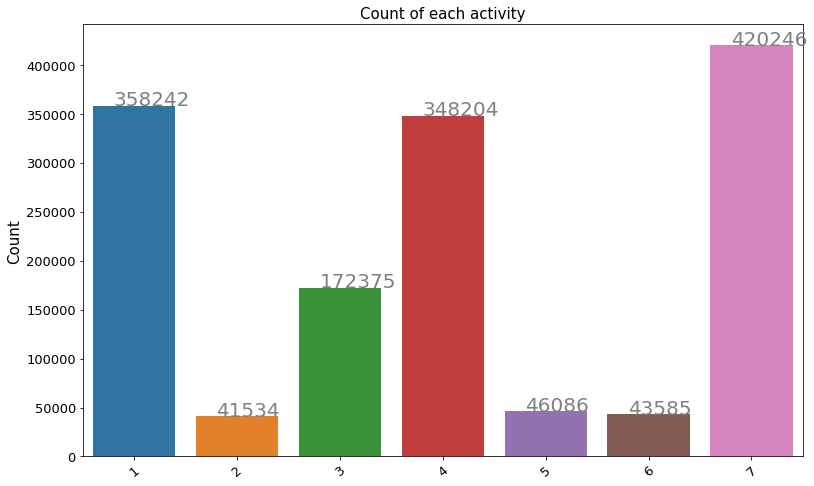

In [7]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity", data = activityDF)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

In [21]:
activityDF = activityDF.sample(frac=1).reset_index(drop=True)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
activityDF[['xAccel', 'yAccel', 'zAccel']] = scaler.fit_transform(activityDF[['xAccel', 'yAccel', 'zAccel']])

In [22]:
X = activityDF[['xAccel', 'yAccel', 'zAccel']]
Y = activityDF[['activity']]

In [23]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(np.array(X), np.array(Y), test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1144217, 3)
(286055, 3)
(1144217, 1)
(286055, 1)


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)

    labels = [" Working at Computer", "Standing Up, Walking and Going updown stairs", "Standing", "Walking", "Going UpDown Stairs", "Walking and Talking with Someone",
             "Talking while Standing"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [25]:
from datetime import datetime
from sklearn.metrics import accuracy_score
def apply_model(cross_val, x_train, y_train, x_test, y_test, model_name):
    start = datetime.now()
    cross_val.fit(x_train, y_train)
    predicted_points = cross_val.predict(x_test)
    
    print("Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): {}\n".format(datetime.now() - start))
    accuracy = np.round(accuracy_score(y_test, predicted_points)*100, 2)
    
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print(str(accuracy)+"%\n")
    
    print('---------------------------')
    print('|      Best Estimator      |')
    print('---------------------------')
    print("{}\n".format(cross_val.best_estimator_))
    
    print('----------------------------------')
    print('|      Best Hyper-Parameters      |')
    print('----------------------------------')
    print(cross_val.best_params_)
    
#     keeping_record(model_name, accuracy)
    
    print("\n\n")
    
    print_confusionMatrix(y_test, predicted_points)

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:01:19.920469

---------------------
|      Accuracy      |
---------------------
59.44%

---------------------------
|      Best Estimator      |
---------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'max_depth': 8}





/home/harindu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


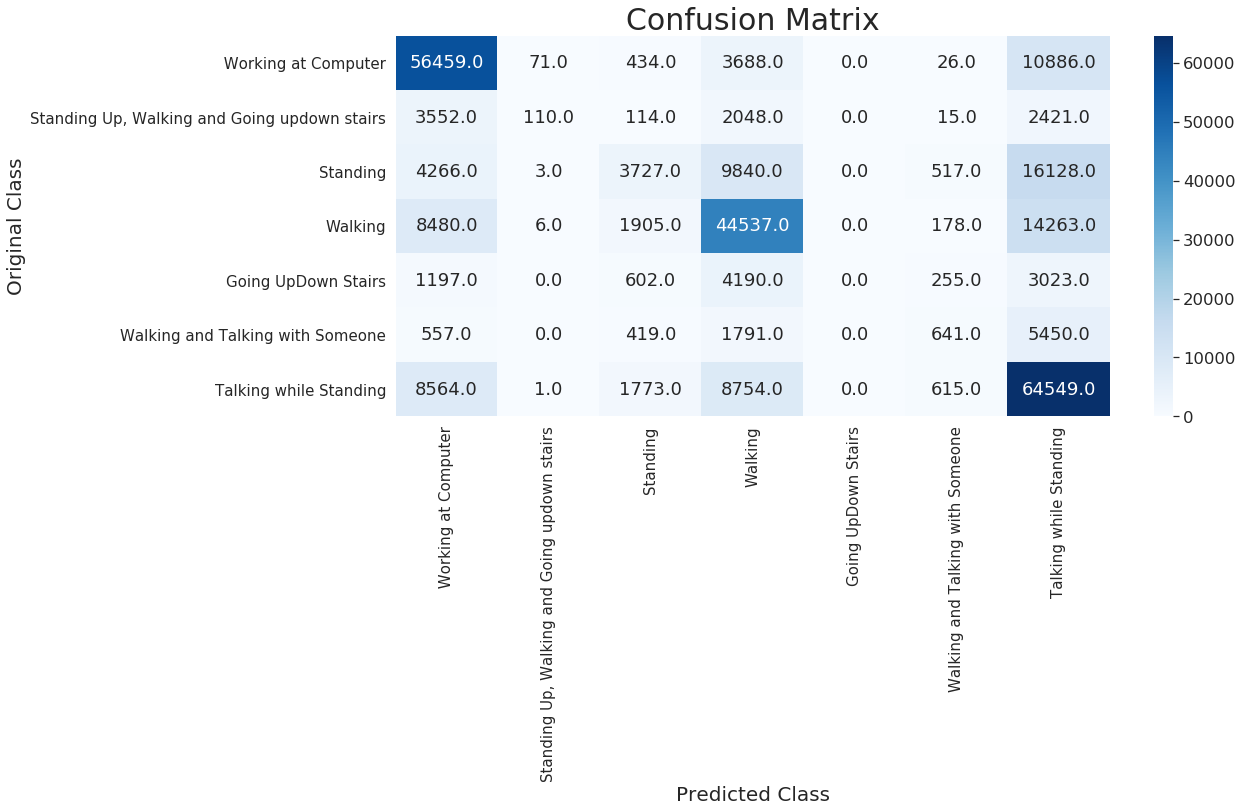

-----------------------------------------------------------------------------------------------------------------------------


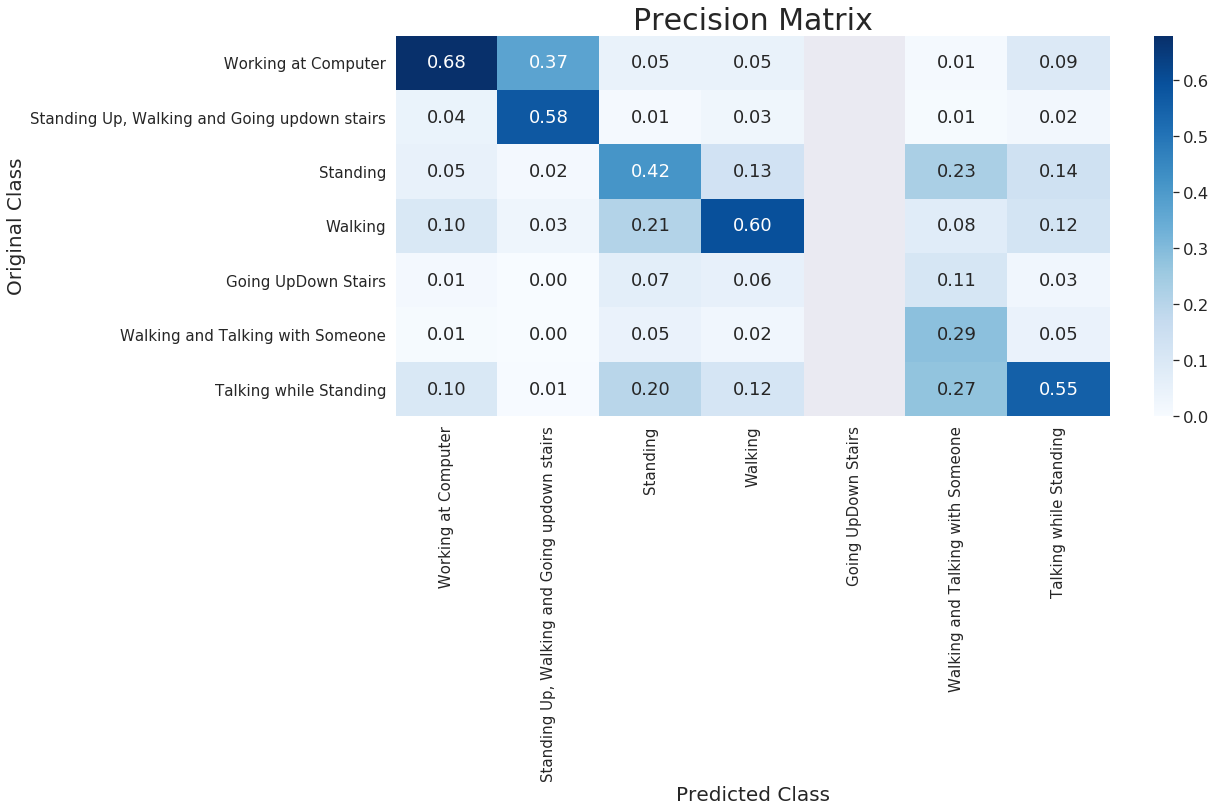

-----------------------------------------------------------------------------------------------------------------------------


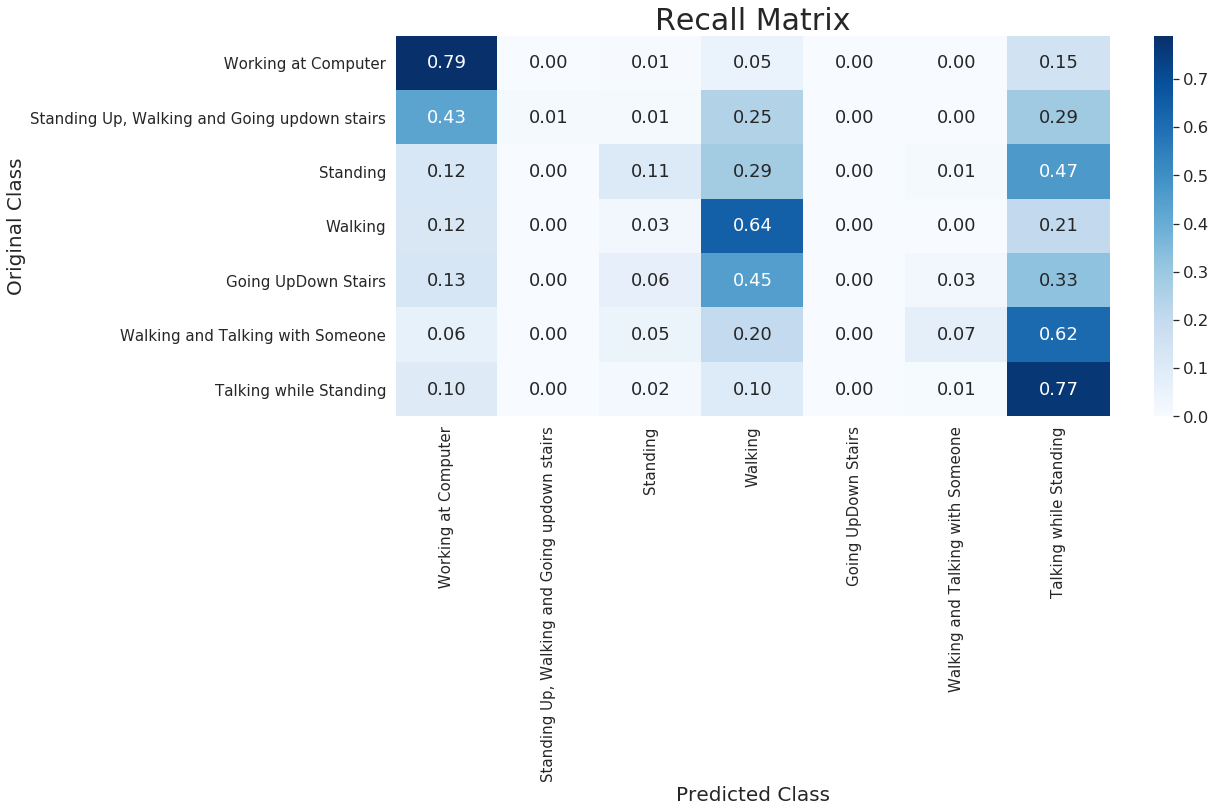

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters = {"max_depth": [2, 3, 4, 5, 6, 7, 8]}
clf = DecisionTreeClassifier()
cross_val = GridSearchCV(clf, parameters, cv=7)
apply_model(cross_val, trainX, trainY, testX, testY, "Decision Trees")